In [ ]:
# PROJECT TITLE: "INVENTORY MANAGEMENT AND DATA ANALYSIS SYSTEM"

In [ ]:
# DEVELOP A PYTHON APPLICATION TO MANAGE INVENTORY FOR A RETAIL STORE AND ANALYZE SALES DATA.THE SYSTEM SHOULD ALLOW THE STORE TO TRACK PRODUCTS,
# MANAGE STOCK, PROCESS, AND GENERATE ANALYTICAL INSIGHTS USING PANDAS AND NUMPY.

In [ ]:
# FUNCTIONALITIES:

# 1.OBJECT-ORIENTED DESIGN:
#. CREATE CLASSES FOR PRODUCT,INVENTORY,SALES, AND STORE.
# . IMPLEMENT METHODS FOR ADDING,UPDATING,DELETING, AND SEARCHING FOR PRODUCTS.

# 2. FILE HANDLING:
# STORE PRODUCT INFORMATION (ID,NAME,PRICE,QUANTITY) IN A FILE (PRODUCTS.CSV).
# USE CSV FILE HANDLING TO READ/WRITE PRODUCT AND SALES DATA.
# IMPLEMENT FEATURES TO BACKUP INVENTORY DATA IN A FILE AT REGULAR INTERVALS(USING DECORATORS).

# 3.SALES PROCESSING:
# MANAGE SALES BY UPDATING PRODUCT QUANTITIES AND TRACKING SALES IN A SEPERATE FILE(SALES.CSV)
# SALES SHOULD BE RECORDED EITH DETAILS SUCH AS PRODUCT ID,NAME,QUANTITY SOLD,PRICE, AND TOTAL COST.

In [1]:
import pandas as pd
import numpy as np
import datetime

# Additional libraries for data visualization (optional):
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import csv
import os
import time


# Product class to represent individual products in the inventory
class Product:
    def __init__(self, product_id, name, price, quantity):
        self.product_id = product_id
        self.name = name
        self.price = price
        self.quantity = quantity

    def __str__(self):
        return f"ID: {self.product_id}, Name: {self.name}, Price: {self.price}, Quantity: {self.quantity}"

# Inventory class to handle product operations
class Inventory:
    def __init__(self, file_path='products.csv'):
        self.file_path = file_path
        self.products = self.load_products()

    # Load products from CSV
    def load_products(self):
        products = []
        if os.path.exists(self.file_path):
            with open(self.file_path, mode='r') as file:
                reader = csv.reader(file)
                next(reader)  # Skip header row
                for row in reader:
                    products.append(Product(int(row[0]), row[1], float(row[2]), int(row[3])))
        return products

    # Save products to CSV
    def save_products(self):
        with open(self.file_path, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['ID', 'Name', 'Price', 'Quantity'])
            for product in self.products:
                writer.writerow([product.product_id, product.name, product.price, product.quantity])

    # Add a new product
    def add_product(self, product):
        self.products.append(product)
        self.save_products()

    # Update product quantity
    def update_product(self, product_id, new_quantity):
        for product in self.products:
            if product.product_id == product_id:
                product.quantity = new_quantity
                break
        self.save_products()

    # Delete a product
    def delete_product(self, product_id):
        self.products = [product for product in self.products if product.product_id != product_id]
        self.save_products()

    # Search for a product by ID
    def search_product(self, product_id):
        for product in self.products:
            if product.product_id == product_id:
                return product
        return None

# Sales class to manage sales transactions
class Sales:
    def __init__(self, inventory, sales_file='sales.csv'):
        self.inventory = inventory
        self.sales_file = sales_file

    # Record a sale
    def record_sale(self, product_id, quantity_sold):
        product = self.inventory.search_product(product_id)
        if product and product.quantity >= quantity_sold:
            total_price = quantity_sold * product.price
            product.quantity -= quantity_sold
            self.inventory.save_products()

            # Append sale to CSV file
            with open(self.sales_file, mode='a', newline='') as file:
                writer = csv.writer(file)
                if os.stat(self.sales_file).st_size == 0:
                    writer.writerow(['Product ID', 'Product Name', 'Quantity Sold', 'Price', 'Total Price', 'Date'])
                writer.writerow([product.product_id, product.name, quantity_sold, product.price, total_price, time.strftime('%Y-%m-%d %H:%M:%S')])

            print(f"Sale recorded: {quantity_sold} units of {product.name} sold.")
        else:
            print("Insufficient stock or product not found.")

# Store class to handle the overall system
class Store:
    def __init__(self):
        self.inventory = Inventory()
        self.sales = Sales(self.inventory)

    # Add a product
    def add_product(self, product):
        self.inventory.add_product(product)

    # Update a product
    def update_product(self, product_id, new_quantity):
        self.inventory.update_product(product_id, new_quantity)

    # Delete a product
    def delete_product(self, product_id):
        self.inventory.delete_product(product_id)

    # Record a sale
    def record_sale(self, product_id, quantity_sold):
        self.sales.record_sale(product_id, quantity_sold)

    # Search for a product
    def search_product(self, product_id):
        return self.inventory.search_product(product_id)

# Example usage
if __name__ == "__main__":
    store = Store()

    # Add products
    store.add_product(Product(1, "Laptop", 1500, 10))
    store.add_product(Product(2, "Mouse", 25, 100))
    store.add_product(Product(3, "Keyboard", 50, 50))

    # Update product quantity
    store.update_product(1, 8)  # Update Laptop quantity to 8

    # Delete a product
    store.delete_product(3)  # Delete Keyboard

    # Record sales
    store.record_sale(1, 2)  # Sell 2 laptops

    # Search for a product
    product = store.search_product(1)
    if product:
        print(f"Product found: {product}")
    else:
        print("Product not found.")

Sale recorded: 2 units of Laptop sold.
Product found: ID: 1, Name: Laptop, Price: 1500, Quantity: 6


In [ ]:
# DATA ANALYSIS USING PANDAS

# LOAD THE SALES AND PRODUCT DATA USING PANDAS
# GENERATE THE FOLLOWING INSIGHTS:
# TOTAL SALES FOR EACH PRODUCT
# DAILY,WEEKLY OR MONTHLY SALES TRENDS
# FIND THE PRODUCT WITH THE HIGHEST SALES REVENUE

Total Sales for Each Product:
  Product Name  Total Price
0       Laptop         3000


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1409: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1409: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1409: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


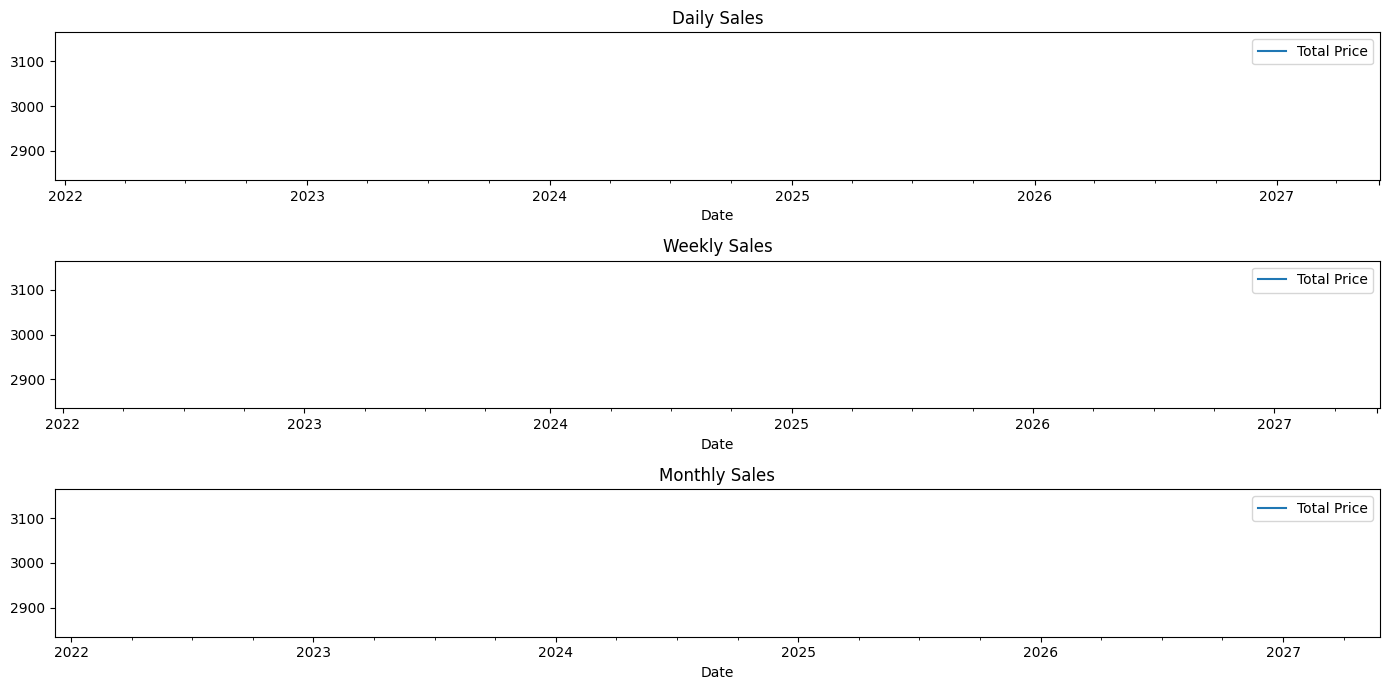

Product with the Highest Sales Revenue: Laptop


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load sales and product data using pandas
def load_data(products_file='products.csv', sales_file='sales.csv'):
    products_df = pd.read_csv(products_file)
    sales_df = pd.read_csv(sales_file)
    return products_df, sales_df

# Calculate total sales for each product
def total_sales_per_product(sales_df):
    sales_df['Total Price'] = sales_df['Quantity Sold'] * sales_df['Price']
    total_sales = sales_df.groupby('Product Name')['Total Price'].sum().reset_index()
    total_sales = total_sales.sort_values(by='Total Price', ascending=False)
    return total_sales

# Generate sales trends
def sales_trends(sales_df):
    sales_df['Date'] = pd.to_datetime(sales_df['Date'])
    sales_df.set_index('Date', inplace=True)

    # Daily Sales
    daily_sales = sales_df.resample('D').agg({'Total Price': 'sum'})

    # Weekly Sales
    weekly_sales = sales_df.resample('W').agg({'Total Price': 'sum'})

    # Monthly Sales
    monthly_sales = sales_df.resample('M').agg({'Total Price': 'sum'})

    return daily_sales, weekly_sales, monthly_sales

# Find the product with the highest sales revenue
def highest_sales_revenue(sales_df):
    sales_df['Total Price'] = sales_df['Quantity Sold'] * sales_df['Price']
    highest_revenue_product = sales_df.groupby('Product Name')['Total Price'].sum().idxmax()
    return highest_revenue_product

# Main function to load data and generate insights
def main():
    products_df, sales_df = load_data()

    # Calculate total sales for each product
    total_sales = total_sales_per_product(sales_df)
    print("Total Sales for Each Product:")
    print(total_sales)

    # Generate sales trends
    daily_sales, weekly_sales, monthly_sales = sales_trends(sales_df)

    # Plot sales trends
    plt.figure(figsize=(14, 7))

    plt.subplot(3, 1, 1)
    daily_sales.plot(y='Total Price', ax=plt.gca(), title='Daily Sales')

    plt.subplot(3, 1, 2)
    weekly_sales.plot(y='Total Price', ax=plt.gca(), title='Weekly Sales')

    plt.subplot(3, 1, 3)
    monthly_sales.plot(y='Total Price', ax=plt.gca(), title='Monthly Sales')

    plt.tight_layout()
    plt.show()

    # Find product with the highest sales revenue
    highest_revenue_product = highest_sales_revenue(sales_df)
    print(f"Product with the Highest Sales Revenue: {highest_revenue_product}")

if __name__ == "__main__":
    main()

In [ ]:
# NUMPY-BASED CALCULATIONS

# USE NUMPY TO CALCULATE THE TOTAL REVENUE FROM SALES.
# PERFORM BASIC STATISTICS ON THE SALES DATA(e.g., AVERAGE SALES PER DAY,TOTAL STOCK VALUE).
# PREDICT FUTURE STOCK NEEDS BASED ON HISTORICAL SALES DATA USING SIMPLE MOVING AVERAGES.

In [4]:
class NumpyCalculations:
    @staticmethod
    def total_revenue(sales):
        return np.sum(sales['Total Cost'])

    @staticmethod
    def average_sales_per_day(sales):
        daily_sales = sales.groupby(sales['Sale Date'].dt.date)['Total Cost'].sum()
        return np.mean(daily_sales)

    @staticmethod
    def moving_average_sales(sales, window=7):
        daily_sales = sales.groupby(sales['Sale Date'].dt.date)['Total Cost'].sum()
        return daily_sales.rolling(window=window).mean()

    @staticmethod
    def total_stock_value(products):
        return np.sum(products['Price'] * products['Quantity'])

In [ ]:
# TESTING AND DECORATORS

# WRITE UNIT TESTS FOR THE CORE FUNCTIONALITIES(ADDING PRODUCTS,PROCESSING SALES).
# IMPLEMENT A DECORATOR THAT LOGS ALL FUNCTION CALLS(e.g., ADDING PRODUCTS, MAKING SALES,GENERATING REPORTS)
# INTO A LOG FILE.

In [54]:
import unittest

class TestInventory(unittest.TestCase):
    def test_add_product(self):
        inventory = Inventory()
        product = Product('001', 'Test Product', 10.0, 50)
        inventory.add_product(product)
        self.assertIn(product.to_dict(), inventory.read_products())

    def test_update_product(self):
        inventory = Inventory()
        inventory.update_product('001', quantity=45)
        product = inventory.search_product('001')
        self.assertEqual(product['Quantity'], '45')

    def test_record_sale(self):
        sales = Sales()
        inventory = Inventory()
        product = inventory.search_product('001')
        sales.record_sale(product, 5)
        updated_product = inventory.search_product('001')
        self.assertEqual(int(updated_product['Quantity']), int(product['Quantity']) - 5)

if __name__ == '__main__':
    unittest.main()


E
ERROR: /root/ (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute '/root/'

----------------------------------------------------------------------
Ran 1 test in 0.002s

FAILED (errors=1)


SystemExit: True

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
